In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os

import functions

In [2]:
#seleciona o modelo
directory_df = "arquivos_Model2.csv"

In [3]:
#carrega os arquivos e já treina o pca
files, columns = functions.get_files(directory_df)
data = {}
pca = {}
for grandeza in columns["Grandeza"]:
    data[grandeza] = functions.get_all_data(grandeza, directory_df)
    pca[grandeza] = PCA().fit(np.concatenate([data[grandeza][x] for x in data[grandeza]]))

plota os gráficos da porcentagem da variância das principais componentes do pca cuja a soma seja maior que minimum_total%

In [4]:
def find_n_components(variance, minimum_total = 95):
    temp=0
    for x in range(variance.shape[0]):
        temp+=variance[x]
        if temp>=minimum_total:
            return x+1

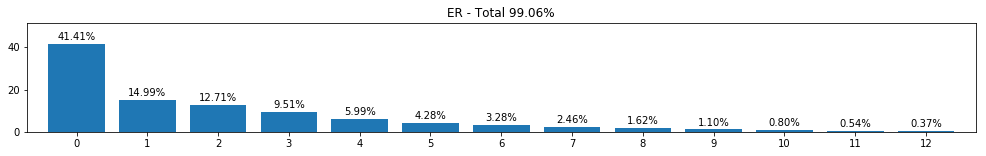

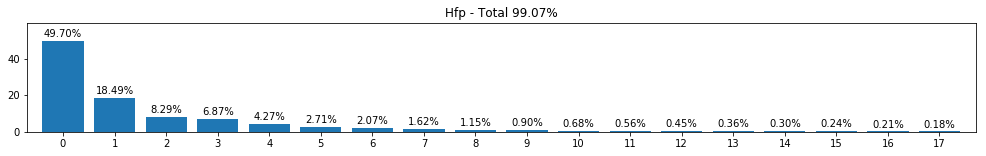

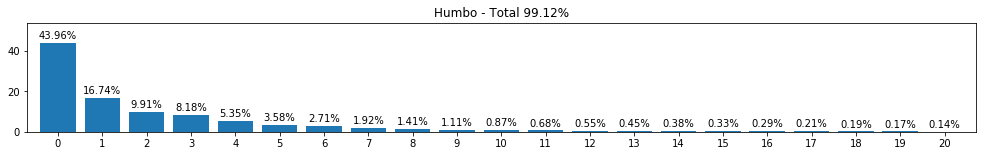

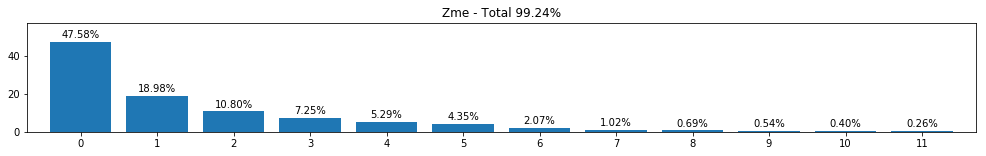

In [5]:
minimum_total = 99
for grandeza in columns["Grandeza"]:
    variance = pca[grandeza].explained_variance_
    n_components = find_n_components(variance, minimum_total)
    pca[grandeza].set_params(n_components=n_components)
    variance = variance[:n_components]
    
    width = 0.8
    fig, ax = plt.subplots(figsize=(17,2))
    ax.set_xticks(np.arange(len(variance)))
    ax.set_title(grandeza + " - Total %.2f%%" %sum(variance[:n_components]))
    plt.ylim(0, variance[0]+10)
    plt.xlim(-0.7, n_components-0.3)
    rects = plt.bar(np.arange(len(variance)), variance, width)
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f%%' %height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    plt.show()
    plt.close('all')

In [6]:
transformed_data = {}
for grandeza in data:
    transformed_data[grandeza] = {}
    for cond in data[grandeza].keys():
        transformed_data[grandeza][cond] = pca[grandeza].transform(data[grandeza][cond])[:,:pca[grandeza].n_components]

In [7]:
files_PCA = files.copy()
first = True
for x in files_PCA.index:
    if x[2]=="data":
        temp = files_PCA["Diretorio"].loc[x].split("/")
        temp[1] += "_PCA"
        
        if first:
            first = False
            os.makedirs("/".join(temp[:-1]))
            np.savetxt("/".join(temp[:-1])+"/PCA.txt", pca["ER"].components_[:pca["ER"].n_components, : ], delimiter="	")
            
        files_PCA["Diretorio"].loc[x] = "/".join(temp)
        
        np.savetxt(files_PCA["Diretorio"].loc[x], transformed_data[x[0]][x[1]], delimiter="	")
        
    else:
        files_PCA = files_PCA.drop(index=x)
files_PCA.to_csv(directory_df[:-4]+"_PCA.csv")

In [8]:
for grandeza in data:
    print(grandeza)

ER
Hfp
Humbo
Zme


In [9]:
def plot_comp_graphs(grandeza):
    temp = []
    for cond in transformed_data[grandeza]:
        temp.append(transformed_data[grandeza][cond])
        
    temp1 = []
    for i in range(temp[0].shape[1]):
        for j in range(len(temp)):
            temp1.append(temp[j][:,i])
    
    labels = list(transformed_data[grandeza].keys())
    
    for i in range(temp[0].shape[1]):
        fig, ax = plt.subplots(figsize=(16,5))
        plt.boxplot(temp1[i*len(temp):(i+1)*len(temp)], showfliers=False)
        ax.set_xticklabels(labels, rotation=25, ha="right")

        plt.show()
        plt.close('all')